In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualizaition 
#from sklearn.model_selection import train_test_split    # splitting the data into train and test
from sklearn.metrics import roc_curve, auc   # metrics to evaluate models
from sklearn.metrics import accuracy_score   # metrics to evaluate models
from sklearn.linear_model import LogisticRegression  # create logic regression model using  
from sklearn.model_selection import  RandomizedSearchCV    #hyper paramater tunnning


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#load taining & test data
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')


# Store target variable of training data in a safe place
survived_train = train_df.Survived

# Concatenate training and test sets
titanic = pd.concat([train_df.drop(['Survived'], axis=1), test_df])

In [3]:
titanic.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# array of columns in dataset
#list(train_df.columns.values)

# list of columns in dataset
list(titanic.columns)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
#datatypes in train data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [6]:
#statistic table 
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
#shape of dataset(number of columns & rows)
titanic.shape

(1309, 11)

In [8]:
#missing value in training data
titanic.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
#Filling missing value of cabin with 'x'unknown
titanic['Cabin'].fillna('x', inplace = True)

In [10]:
#filling missing value of age column column with mean
titanic['Age'].fillna(train_df['Age'].mean(), inplace = True)


In [11]:
#filling missing value of age column column with mean
titanic['Fare'].fillna(train_df['Fare'].mean(), inplace = True)

In [12]:
titanic.groupby('Embarked').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,
C,270,270,270,270,270,270,270,270,270,270
Q,123,123,123,123,123,123,123,123,123,123
S,914,914,914,914,914,914,914,914,914,914


In [13]:
#filling 2 missing value in 'Embarked' column with 'S' 
titanic['Embarked'].fillna('S', inplace = True)

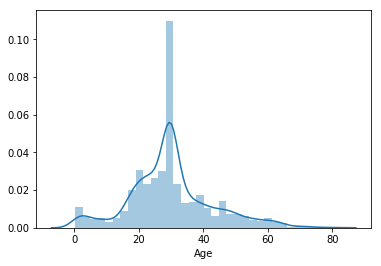

In [14]:
#distribution of Age 
sns.distplot(titanic['Age'], hist = True) 

 Age distribution is normal 

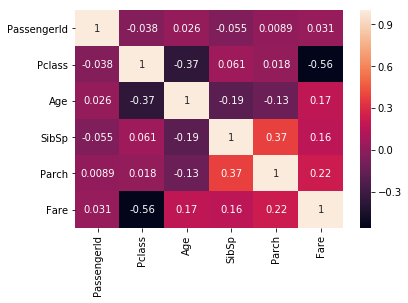

In [15]:
#Correlation heatmap
sns.heatmap(titanic.corr(), annot= True)

'Pclass' & 'Fare' are negatively correlated. 

In [16]:
#creating one hot encoding for categorical feature
list_categ = ['Pclass','Sex','Cabin','Embarked', 'Parch', 'SibSp']
Pclass_dummy = pd.get_dummies(titanic['Pclass'],drop_first=True, prefix='Pclass')
Sex_dummy = pd.get_dummies(titanic['Sex'],drop_first=True, prefix='Sex')
Cabin_dummy = pd.get_dummies(titanic['Cabin'],drop_first=True,prefix='Cabin')
Embarked_dummy = pd.get_dummies(titanic['Embarked'],drop_first=True,prefix = 'Embarked')
Parch_dummy = pd.get_dummies(titanic['Parch'],drop_first=True, prefix='Parch')
SibSp_dummy = pd.get_dummies(titanic['SibSp'],drop_first=True, prefix='SibSp')

In [17]:
# merge all dummified categorical columns
titanic= pd.concat([titanic,Pclass_dummy,Sex_dummy,Cabin_dummy,Embarked_dummy,Parch_dummy,SibSp_dummy],1)
titanic.shape

(1309, 215)

In [18]:
#delete all non dummified columns
titanic =titanic.drop(['Pclass', 'Sex','Cabin', 'Embarked', 'Parch', 'SibSp'],axis = 1)
titanic.shape

(1309, 209)

In [19]:
titanic.head()

,PassengerId,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_A11,Cabin_A14,...,Parch_4,Parch_5,Parch_6,Parch_9,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,1,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,"Allen, Mr. William Henry",35.0,373450,8.0500,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#prepare train test data
train = titanic.iloc[:891]
test = titanic.iloc[891:].drop(['Name','Ticket'],axis =1)
y = survived_train
X = train.drop(['Ticket','Name'],axis=1)

In [21]:
#create a logistic regression model
logreg = LogisticRegression()
logreg.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#  make class predictions for the testing set
y_prediction = logreg.predict(test)
# calculate accuracy with threshold of 0.5
accuracy = accuracy_score(y, y_prediction)

ValueError: Found input variables with inconsistent numbers of samples: [891, 418]

In [23]:
# rams = { 
#     'n_estimators': [200, 700],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth':np.arange(5,15,1)
# }
# random_search = RandomizedSearchCV(estimator=logreg, param_distributions=params, cv= 5)

# random_search.fit(X, y)
# print (random_search.best_params_)